<a href="https://colab.research.google.com/github/LAXMINARAYAN-SHARMA/models_coded_for_options/blob/main/boston_housing_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT DATA

In [ ]:
import pandas as pd

In [ ]:
df_boston_housing=pd.read_csv('https://drive.google.com/uc?export=download&id=1TcksSoLneM175L1CC1wHGdvO-CXfMmAv')
df_boston_housing.head()


## DATA PREPROCESSING

## GET TO KNOW THE DATA

DESCRIPTION OF COLUMNS

*   CRIM: Per capita crime rate by town

This feature represents the number of crimes per capita in a town. Higher values indicate a higher crime rate.

*ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.

This feature indicates the proportion of land in a town that is zoned for large residential lots (greater than 25,000 square feet). Higher values suggest more land is allocated for larger residential lots.

*INDUS: Proportion of non-retail business acres per town

This feature represents the proportion of land in a town that is used for industrial purposes rather than retail. Higher values indicate a higher proportion of industrial land.
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

This binary feature indicates whether the tract of land borders the

*Charles River. A value of 1 means the tract is adjacent to the river, and 0 means it is not.

*NOX: Nitric oxides concentration (parts per 10 million)

This feature measures the concentration of nitrogen oxides, which are pollutants, in the air. Higher values indicate worse air quality due to higher levels of nitrogen oxides.

*RM: Average number of rooms per dwelling

This feature represents the average number of rooms per residential unit in a town. It is a measure of the size of the houses. Higher values indicate larger homes on average.

*AGE: Proportion of owner-occupied units built prior to 1940

This feature indicates the proportion of housing units that were built before 1940 and are still owner-occupied. Higher values suggest a greater presence of older housing stock.

*DIS: Weighted distances to five Boston employment centers

This feature measures the weighted average of distances from each town to five major employment centers in the Boston area. Lower values indicate shorter distances to employment centers, which could be an indicator of better accessibility and potentially higher property values.

*RAD: Index of accessibility to radial highways

This feature is an index that measures the accessibility of a town to major radial highways. Higher values suggest better accessibility to these highways, which can be an indicator of better transportation infrastructure.

*TAX: Full-value property tax rate per $10,000

This feature represents the property tax rate per $10,000 of full value. Higher values indicate higher property taxes.

*PTRATIO: Pupil-teacher ratio by town

This feature measures the ratio of students to teachers in schools in a town. Higher values indicate larger class sizes, which could be an indicator of the quality of the education system.

*B: 1000(Bk - 0.63)^2 where Bk is the proportion of black residents by town

This feature is a transformation of the proportion of black residents in a town. Higher values of Bk (the proportion of black residents) will affect this feature, and it was likely included to capture socioeconomic or demographic effects on housing prices.

*LSTAT: Percentage of lower status of the population

This feature represents the percentage of the population that is considered lower status based on certain socioeconomic criteria. Higher values indicate a larger proportion of lower-status individuals.

*MEDV: Median value of owner-occupied homes in $1000s

This is the target variable, representing the median value of owner-occupied homes in a town, measured in thousands of dollars. This is the variable we aim to predict using the other features.

*   





In [ ]:
print(df_boston_housing.info())
print(df_boston_housing.head(10))
print(df_boston_housing.columns)

# HANDLING NULL VALUES AND DATA TYPES

OPTION AVAILABLE ARE

1.   REMOVE THE CORRESPONDING ROWS
2.   REPLACE THEM WITH MEAN,MEDIAN,MODE



In [ ]:
#GET THE  NO OF VALUES THAT ARE NULL IN EACH COLUMN
print(df_boston_housing.isnull().sum())

#DELETE THOSE ROWS WITH NULL VALUE(drop na returns dataframe if not inplace)

df_boston_housing.dropna(inplace=True)



In [ ]:
# TRY TO REPLACE THE NULL VALUES WITH MEDIAN ,MEAN ,MODE etc here

## GETTING IT MATHEMATICALLY RIGHT

In [ ]:
print(df_boston_housing.describe())

CORRELATION COEFFICIENT


*   TELLS US ABOUT THE EXISTENCE OF ONLY LINEAR RELATIONSHIP
*   SIGNIFICANTLY AFFECTED BY OUTLIERS
*   OTHER METHODS ARE
    General Relationships:
To understand and quantify more general relationships (not necessarily linear), other methods and measures are used, such as:

Spearman's Rank Correlation: Measures the strength and direction of the monotonic relationship between two ranked variables.
Kendall's Tau: Another rank-based correlation measure that assesses the strength and direction of association between two variables.
Regression Analysis: Can model various types of relationships (linear, polynomial, logistic, etc.) to understand how one variable affects another.
Non-parametric methods: Methods like kernel density estimation or splines can model complex relationships between variables.



In [ ]:
correl_data_frame=df_boston_housing.corr()

#FINDING COLUMNS HIIGHLY LINEARLY CORRELATED TO TARGET COLUMN
correl_data_frame[(abs(correl_data_frame['MEDV'])>0.6) & (correl_data_frame['MEDV']!=1) ]['MEDV']



## LETS HAVE SOME VISUALS OF DATA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



 ARE YOU NORMAL:
 NORMAL AND CLOSE TO NORMAL COLUMNS ARE


1.   RM
2.   LSTAT
3.   MED VAL


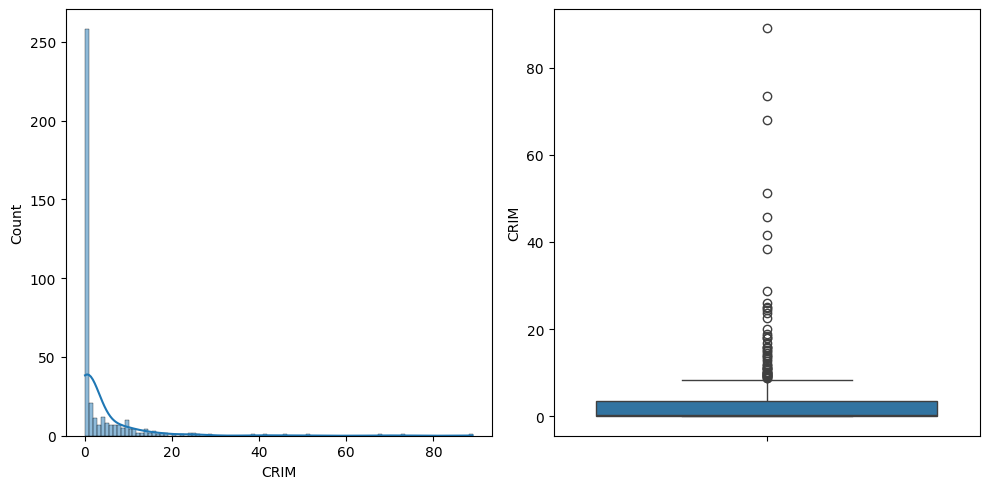

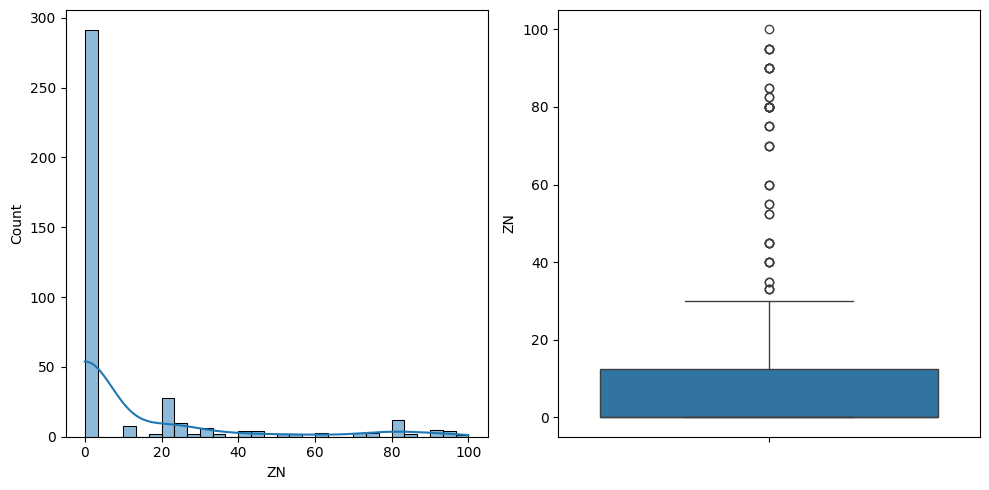

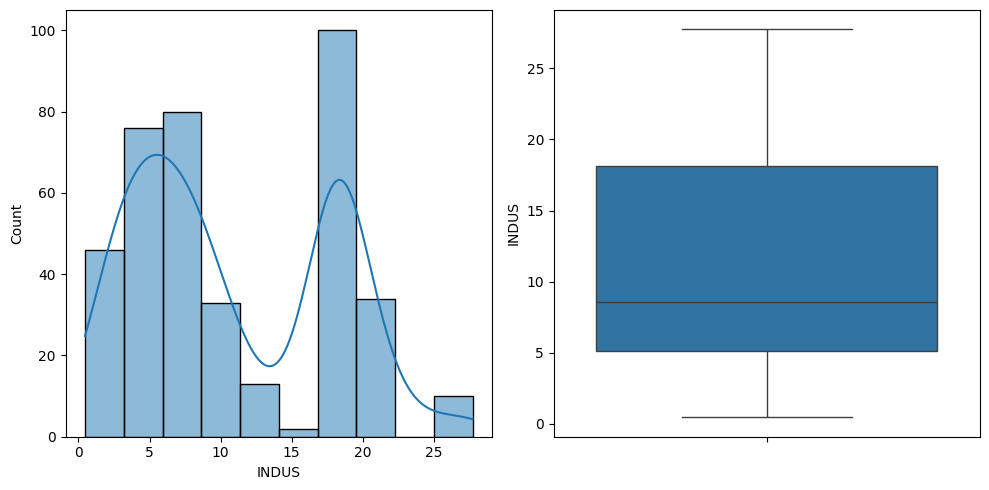

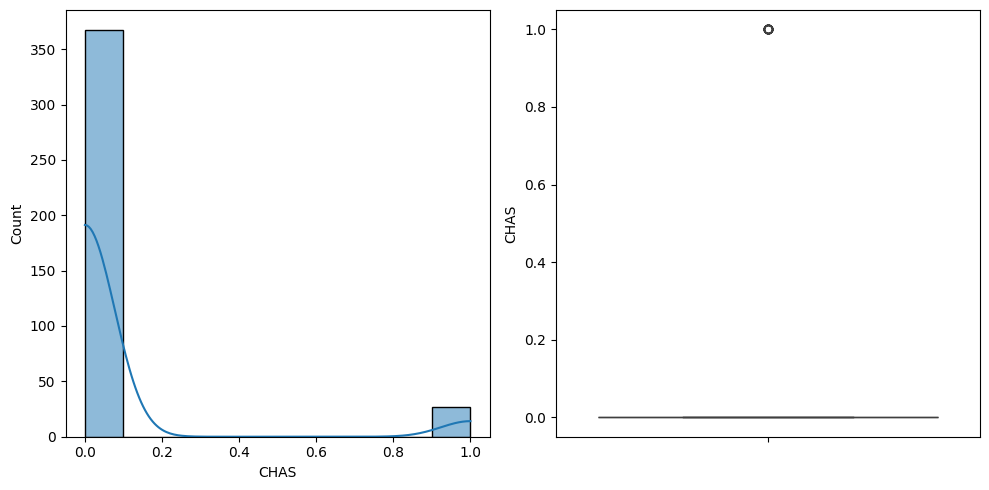

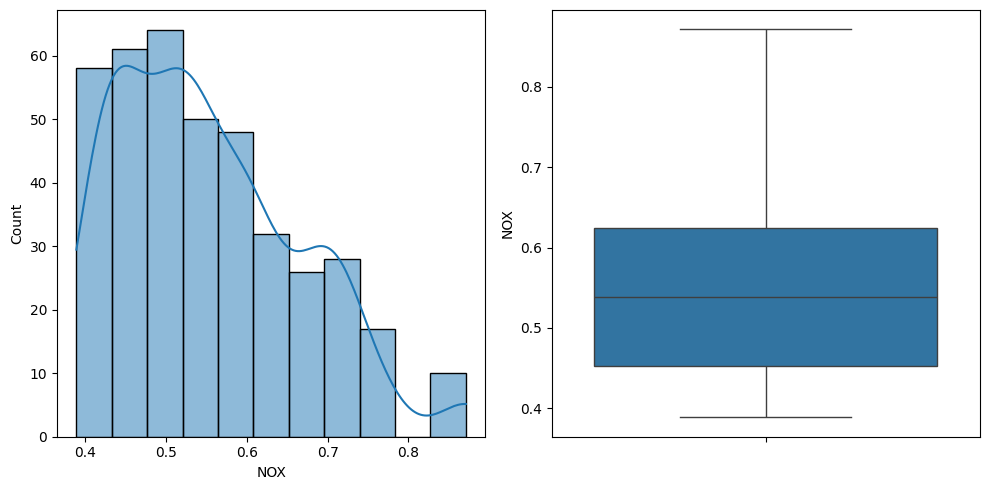

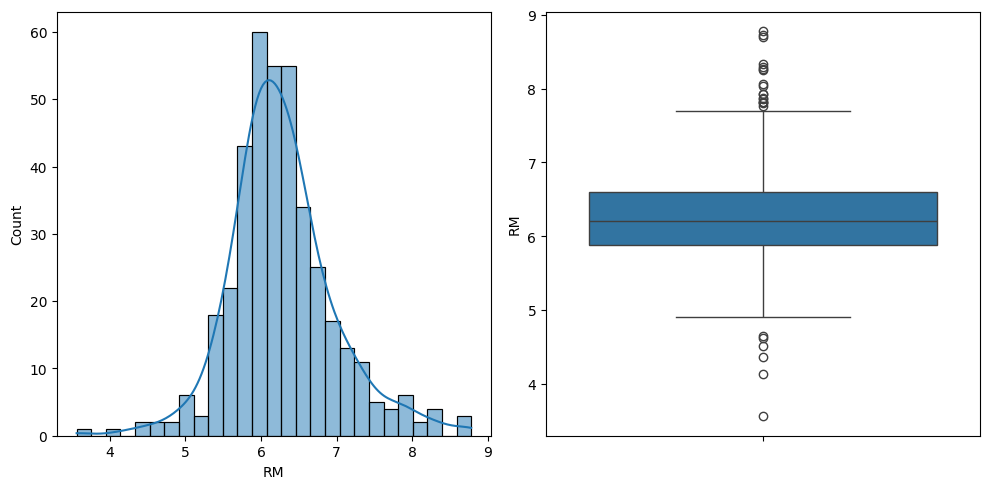

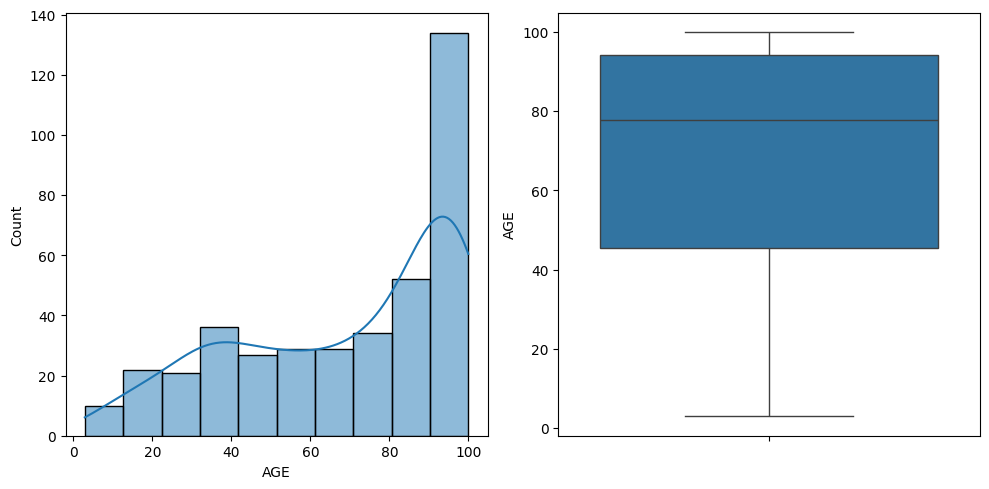

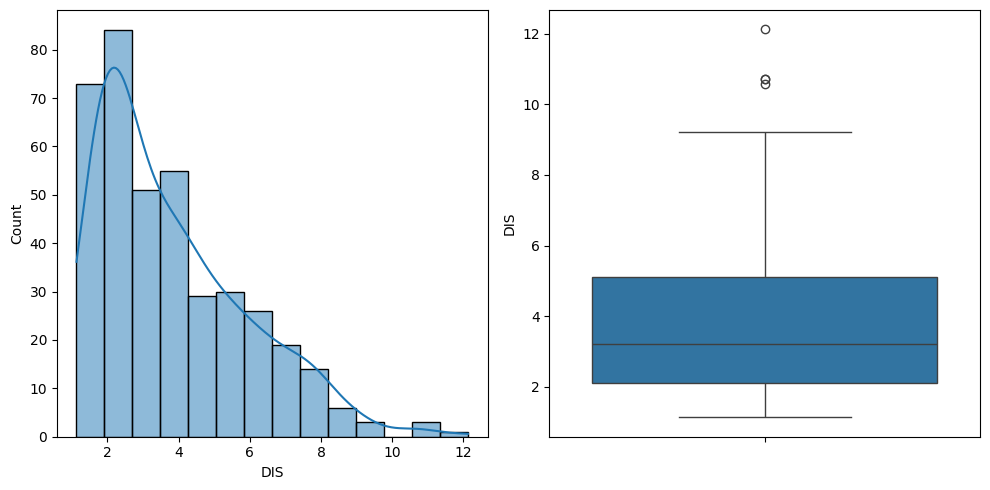

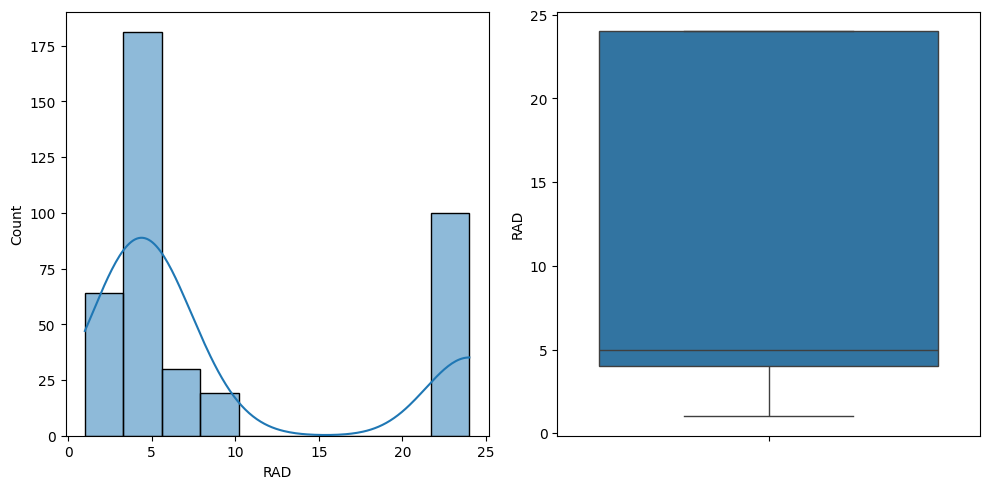

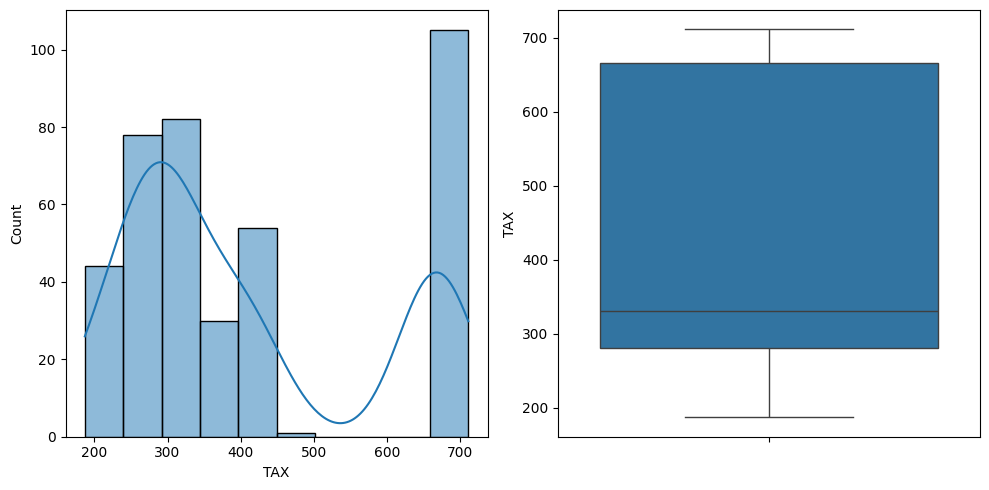

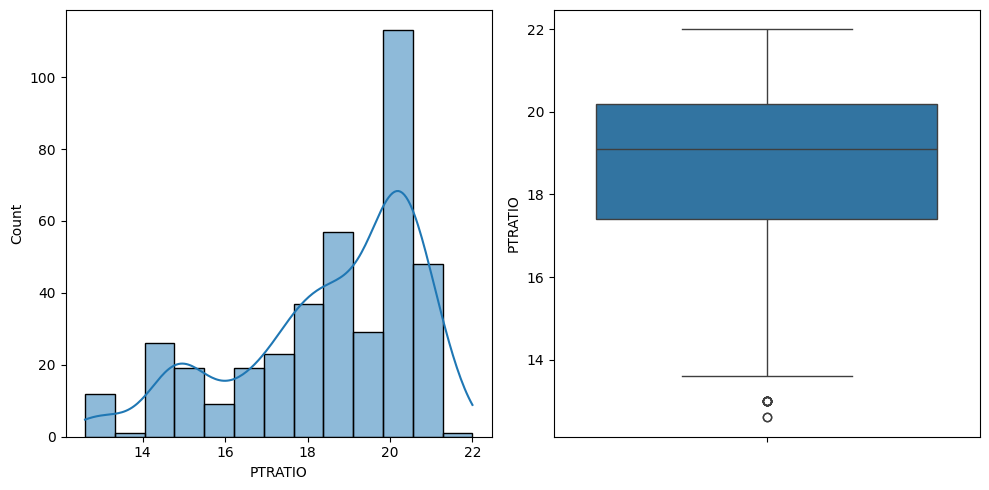

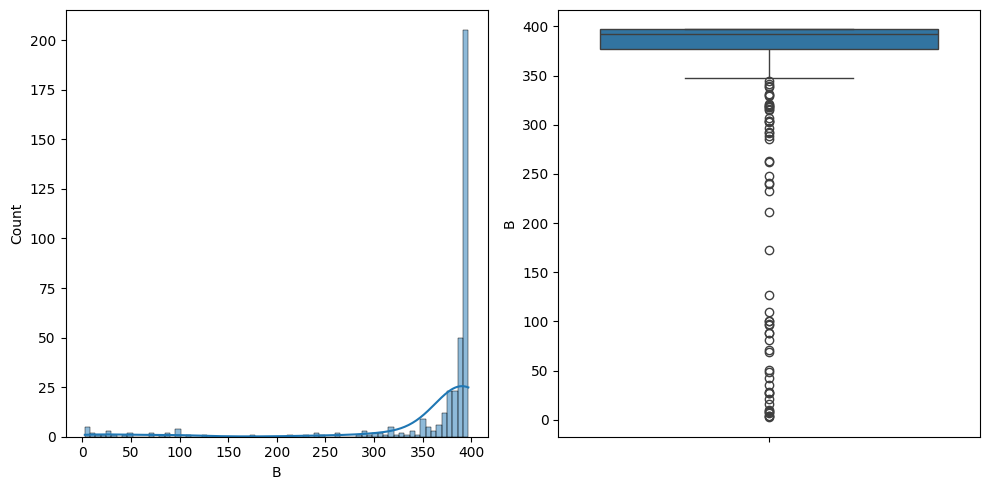

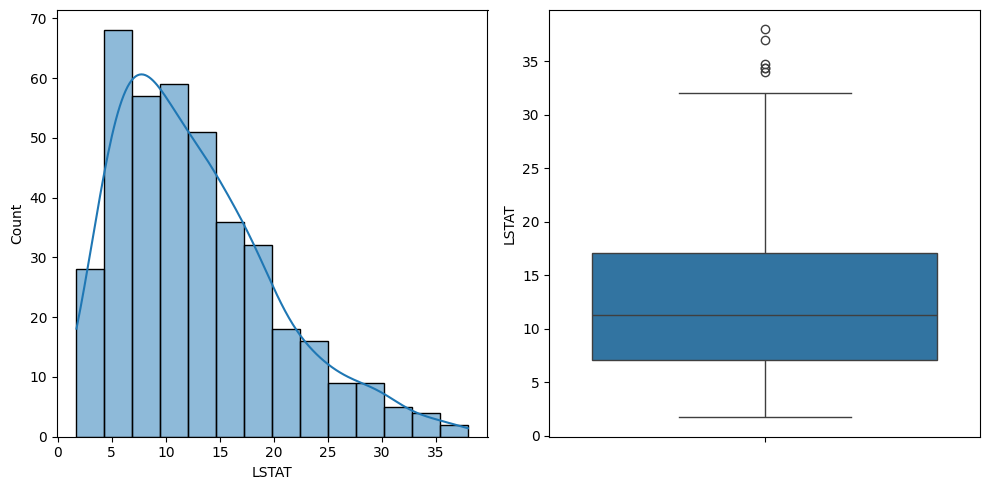

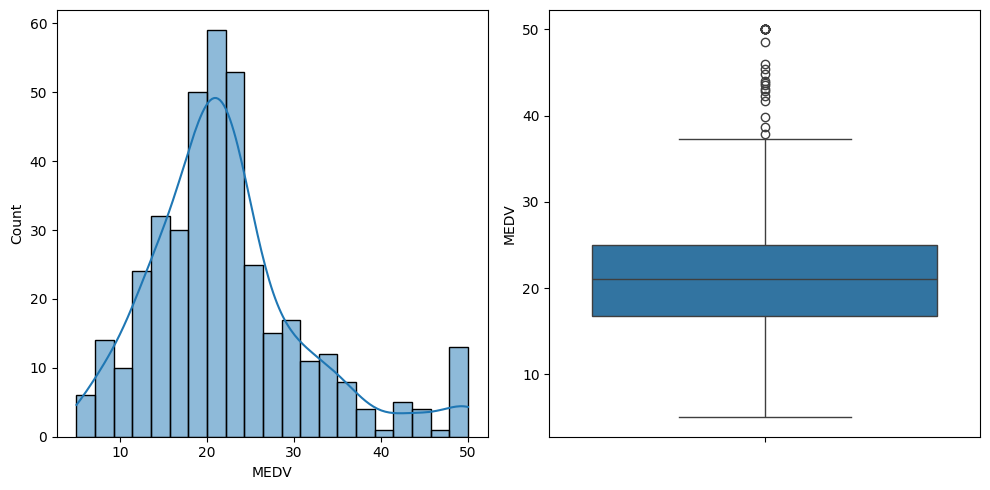

In [ ]:
for col in df_boston_housing.columns:
  plt.figure(figsize=(10,5))

  plt.subplot(1,2,1)
  sns.histplot(df_boston_housing[col],kde=True)

  plt.subplot(1,2,2)
  sns.boxplot(df_boston_housing[col])
  plt.tight_layout()
  plt.show()

HAVE SOME BOX PLOT



*   IQR=Q3-Q1
*   LOWER WISKER=Q1-1.5*IQR,UPPER WHISKER=Q3+1.5*IQR
*   POINTS ABOVE AND BELOW WHISKERS ARE OUTLIERS
*   MEDIAN IN CENTER OF BOX MAY IMPLY SYMMETRY IN DATA
*   MEDIAN CLOSER TO BOOTOM ==DATA SKWED RIGHT
*   LONGER BOX=HIGH VARIABILITY IN Q1 TO Q3 RANGE
*   






# CHECK CATEGORICAL OR NOT

In [ ]:
df_count_categories=pd.DataFrame(index=df_boston_housing.columns,columns=['unique_count'])
for col in df_boston_housing.columns:
  df_count_categories[col]['unique_count']=len(df_boston_housing[col].value_counts())
print(df_count_categories)


KeyError: 'CRIM'